In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#conda install -c anaconda keras
#pip install pycaret-nightly

In [2]:
#Read Adams dataset

df1 = pd.read_csv('Adams.csv',encoding='latin1')
#df1=pd.read_excel("Adams1.xlsx")

df1.head(5)

,Unnamed: 0,Provider ID,Service Name,Base Name / Site,State,City,Zip,Location Type,# RW,# FW,NPIAS,Level 1
0,FW,AK011,"40-Mile Air, LTD.",Tok Airport,AK,Tok,99780,Airport,NaN,1,NaN,NaN
1,RW,MT004,A.L.E.R.T.,Glacier Park International Airport,MT,Kalispell,59901,Airport,NaN,1,Y,NaN
2,RW,MT004,A.L.E.R.T.,Kalispell Regional Medical Center,MT,Kalispell,59901,Hospital,2,NaN,NaN,NaN
3,FW,MN005,A.L.S. Aerocare,Flying Cloud Airport,MN,Eden Prairie,55347,Airport,NaN,5,Y,NaN
4,RW,LA001,Acadian Ambulance Air Med Services,Air Med 3 Pecue Lane Helipad,LA,Baton Rouge,70809,Helipad,1,NaN,NaN,NaN


In [3]:
#Display list of columns
for col in df1.columns:
    print(col)

Unnamed: 0
Provider ID
Service Name
Base Name / Site
State
City
Zip
Location Type
# RW
# FW
NPIAS
Level 1


In [4]:
df1.columns.values[0] 

'Unnamed: 0'

In [5]:
#Assign a name to the unnamed column

df1.columns.values[0] = 'Aircraft_Type'
df1.head(5)

,Aircraft_Type,Provider ID,Service Name,Base Name / Site,State,City,Zip,Location Type,# RW,# FW,NPIAS,Level 1
0,FW,AK011,"40-Mile Air, LTD.",Tok Airport,AK,Tok,99780,Airport,NaN,1,NaN,NaN
1,RW,MT004,A.L.E.R.T.,Glacier Park International Airport,MT,Kalispell,59901,Airport,NaN,1,Y,NaN
2,RW,MT004,A.L.E.R.T.,Kalispell Regional Medical Center,MT,Kalispell,59901,Hospital,2,NaN,NaN,NaN
3,FW,MN005,A.L.S. Aerocare,Flying Cloud Airport,MN,Eden Prairie,55347,Airport,NaN,5,Y,NaN
4,RW,LA001,Acadian Ambulance Air Med Services,Air Med 3 Pecue Lane Helipad,LA,Baton Rouge,70809,Helipad,1,NaN,NaN,NaN


In [6]:
#Assign appropriate names to all columns

df = df1.rename({'Provider ID': 'Provider_ID',
                 'Service Name': 'Service_Name',
                 'Base Name / Site': 'Base_Name',
                 'Location Type' :'Location_Type',
                 '# RW':'RW',
                 '# FW': 'FW',
                 'Level 1': 'Level1'}, axis=1)

In [7]:
#Check for Duplicates

dupsCheck = df.duplicated()
print('Number of duplicate rows = %d' % (dupsCheck.sum()))

Number of duplicate rows = 0


In [8]:
#Check for the no.of records, columns and null values

print('Number of instances = %d\nNumber of attributes = %d' % (df.shape[0], df.shape[1]))
print('------------------------------')
print('Columns           Null Values')
df.isnull().sum() 

Number of instances = 1110
Number of attributes = 12
------------------------------
Columns           Null Values


Aircraft_Type       0
Provider_ID         0
Service_Name        1
Base_Name           2
State               0
City                2
Zip                 3
Location_Type       2
RW                159
FW                900
NPIAS             498
Level1           1064
dtype: int64

In [9]:
#Check for the various column datatypes

df.dtypes

Aircraft_Type    object
Provider_ID      object
Service_Name     object
Base_Name        object
State            object
City             object
Zip              object
Location_Type    object
RW               object
FW               object
NPIAS            object
Level1           object
dtype: object

In [10]:
#Replace incorrect spellings with appropriate values for the column, 'Location_Type'

df['Location_Type'] = df['Location_Type'].replace(['Airport *','Airpport'],'Airport')

In [11]:
#Check for the updated changes

df.to_csv("adams_cleaned1.csv", index = False)

In [12]:
#Check for the missing value records in the column, 'Base_Name'

df[df['Base_Name'].isnull()].index.tolist()

[795, 798]

In [13]:
df.loc[[795, 798]]


,Aircraft_Type,Provider_ID,Service_Name,Base_Name,State,City,Zip,Location_Type,RW,FW,NPIAS,Level1
795,RW,PA011,MidAtlantic MedEvac,NaN,PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
798,RW,KS005,Midwest AeroCare,NaN,KS,NaN,NaN,Non- Base,1#,NaN,NaN,NaN


In [14]:
#Drop the null value records for 'Base_Name' since majority of the values in the record contains null values

df=df.drop([795, 798])

In [15]:
#Check for null values in remaining columns

print('Columns           Null Values')
df.isnull().sum() 

Columns           Null Values


Aircraft_Type       0
Provider_ID         0
Service_Name        1
Base_Name           0
State               0
City                0
Zip                 1
Location_Type       1
RW                158
FW                898
NPIAS             496
Level1           1062
dtype: int64

In [16]:
#Identify the records containing null value in the column, 'Zip'

df[df['Zip'].isnull()].index.tolist()

[625]

In [17]:
df.loc[[625]]

,Aircraft_Type,Provider_ID,Service_Name,Base_Name,State,City,Zip,Location_Type,RW,FW,NPIAS,Level1
625,RW,PA004,LifeFlight (Allegheny General Hospital),Clarion Hospital,PA,Clarion,NaN,NaN,1,NaN,NaN,NaN


In [18]:
#Replace the null value in 'Zip', using 'City' and 'State' information

df["Zip"].fillna(16214, inplace=True)

In [19]:
#Check for the updated changes

df.loc[[625]]

,Aircraft_Type,Provider_ID,Service_Name,Base_Name,State,City,Zip,Location_Type,RW,FW,NPIAS,Level1
625,RW,PA004,LifeFlight (Allegheny General Hospital),Clarion Hospital,PA,Clarion,16214,NaN,1,NaN,NaN,NaN


In [20]:
#Count for each group in 'Location_Type'

df.Location_Type.value_counts()

Airport      626
Hospital     312
Helipad      162
Office         6
Non- Base      1
Name: Location_Type, dtype: int64

In [21]:
#Replace null value in 'Location_Type' with 'Airport' value, since the value for Airport is the highest

df["Location_Type"].fillna('Airport', inplace=True)

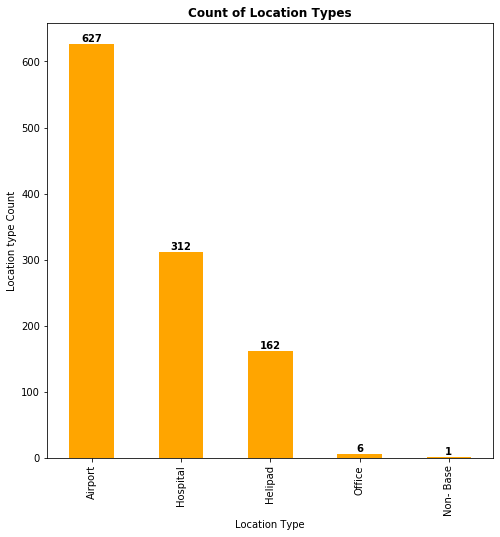

In [22]:
#Plot a bar graph for counting each group in 'Location_Type'

ax1=df.Location_Type.value_counts().plot(kind = 'bar', 
                                    color = 'orange',
                                    figsize = (8,8))
for rect in ax1.patches:
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width()/2., 1.00*height,
                '%d' % int(height),
              ha='center',va='bottom',fontweight= 'bold')

ax1.set_title('Count of Location Types', fontweight='bold')
plt.xlabel('Location Type')
plt.ylabel('Location type Count')
plt.show()

In [23]:
#Check for null values in remaining columns

print('Columns           Null Values')
df.isnull().sum()

Columns           Null Values


Aircraft_Type       0
Provider_ID         0
Service_Name        1
Base_Name           0
State               0
City                0
Zip                 0
Location_Type       0
RW                158
FW                898
NPIAS             496
Level1           1062
dtype: int64

In [24]:
#Identify records containing null values in column, 'Service_Name'

df[df['Service_Name'].isnull()].index.tolist()

[1109]

In [25]:
df.loc[[1109]]

,Aircraft_Type,Provider_ID,Service_Name,Base_Name,State,City,Zip,Location_Type,RW,FW,NPIAS,Level1
1109,RW,TX011,NaN,Rick Husband Amarillo International Airport,TX,Amarillo,79108,Airport,NaN,1,N,NaN


In [26]:
#Extract values and count for 'Service_Name' through records containing
#'State', 'City' and 'Zip' values from the above obtained record

servData = df[(df.State == 'TX') & (df.City == 'Amarillo') & 
              (df.Zip == '79108') & (df.Service_Name!='')].Service_Name.value_counts().sort_values(ascending=False)
servData

EagleMed, LLC    1
Name: Service_Name, dtype: int64

In [27]:
#Replace null value with value from above identified record

df["Service_Name"].fillna('EagleMed, LLC', inplace=True)

In [28]:
#Check for null values in remaining columns

print('Columns           Null Values')
df.isnull().sum()

Columns           Null Values


Aircraft_Type       0
Provider_ID         0
Service_Name        0
Base_Name           0
State               0
City                0
Zip                 0
Location_Type       0
RW                158
FW                898
NPIAS             496
Level1           1062
dtype: int64

In [29]:
#Replace null value in 'Level1' with 'N', as all other records have value, 'Y'

df["Level1"].fillna('N', inplace=True)

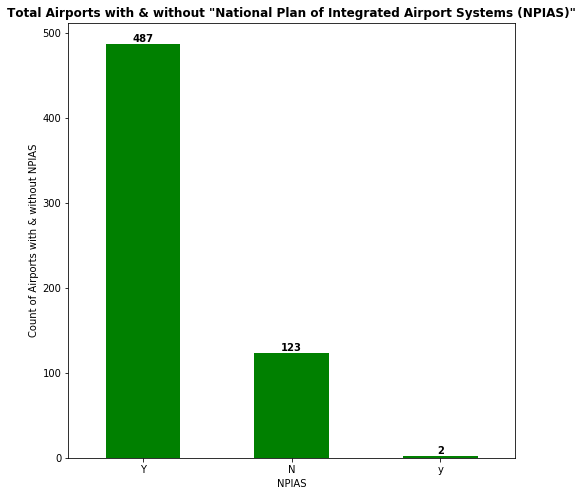

In [30]:
#Plot a bar graph for counting airports that do and don't fall under NPIAS

ax2=df.NPIAS.value_counts().plot(kind = 'bar', 
                                 color = 'GREEN',
                                 rot='horizontal',
                                 figsize = (8,8))
for rect in ax2.patches:
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width()/2., 1.00*height,
                '%d' % int(height),
              ha='center',va='bottom',fontweight= 'bold')
ax2.set_title('Total Airports with & without "National Plan of Integrated Airport Systems (NPIAS)"', fontweight='bold')
plt.xlabel('NPIAS')
plt.ylabel('Count of Airports with & without NPIAS')
plt.show()

In [31]:
#We identify that there are 2 values for 'yes' in column 'NPIAS'
#Replace 'y' with 'Y' in 'NPIAS' column

df['NPIAS'] = df['NPIAS'].replace(['y'],'Y')

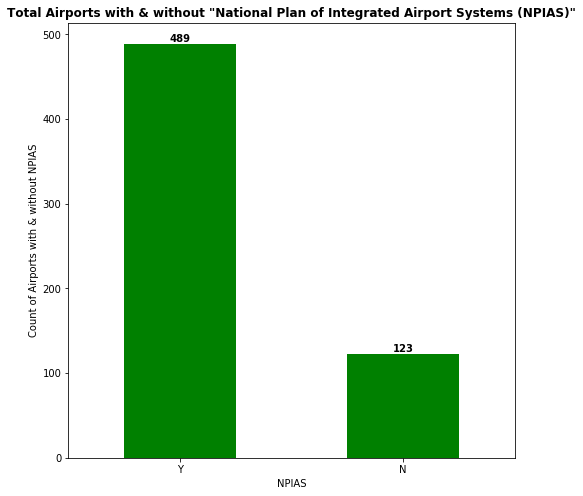

In [32]:
#Plot a bar graph again to count airports that do and don't fall under NPIAS

ax2=df.NPIAS.value_counts().plot(kind = 'bar', 
                                 color = 'GREEN',
                                 rot='horizontal',
                                 figsize = (8,8))
for rect in ax2.patches:
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width()/2., 1.00*height,
                '%d' % int(height),
              ha='center',va='bottom',fontweight= 'bold')
ax2.set_title('Total Airports with & without "National Plan of Integrated Airport Systems (NPIAS)"', fontweight='bold')
plt.xlabel('NPIAS')
plt.ylabel('Count of Airports with & without NPIAS')
plt.show()

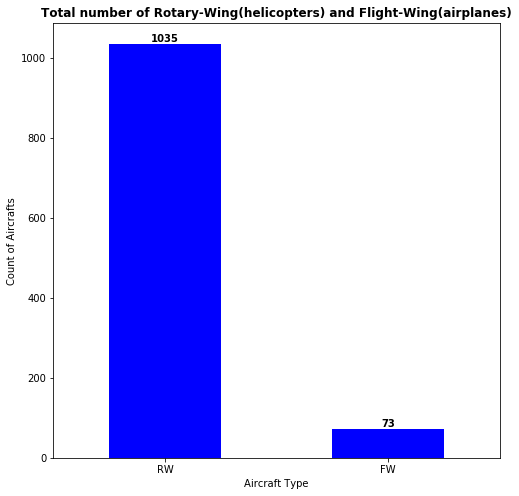

In [33]:
#Plot a bar graph for counting total no. of different aircrafts

ax3=df.Aircraft_Type.value_counts().plot(kind = 'bar', 
                                    color = 'blue',
                                    rot='horizontal',
                                    figsize = (8,8))
for rect in ax3.patches:
    height = rect.get_height()
    ax3.text(rect.get_x() + rect.get_width()/2., 1.00*height,
                '%d' % int(height),
              ha='center',va='bottom',fontweight= 'bold')
ax3.set_title('Total number of Rotary-Wing(helicopters) and Flight-Wing(airplanes)', fontweight='bold')
plt.xlabel('Aircraft Type')
plt.ylabel('Count of Aircrafts')
plt.show()

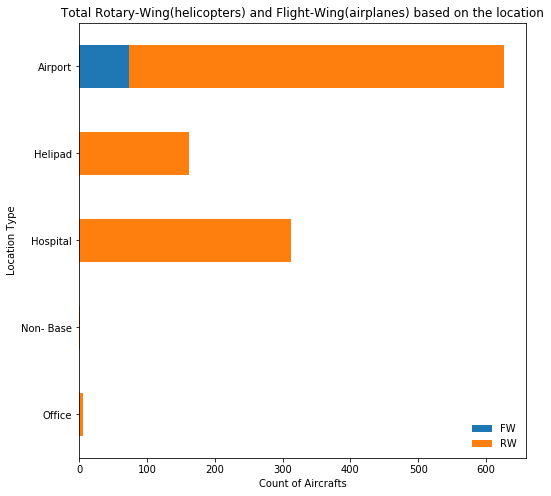

In [34]:
# Plot a horizontal Stacked bar chart for total no.of different aircrafts based on location type

ax4 = df[['Aircraft_Type','Location_Type']].groupby(['Location_Type','Aircraft_Type']).size().unstack().sort_values(by='Location_Type',
                                                                                                                   ascending=False)
ax4.plot(kind = 'barh', stacked = True, rot='horizontal',
       title='Total Rotary-Wing(helicopters) and Flight-Wing(airplanes) based on the location',
       figsize = (8,8))
plt.xlabel('Count of Aircrafts')
plt.ylabel('Location Type')
plt.legend(loc='lower right', frameon=False)
plt.show()

In [35]:
#Save the cleaned dataset to a csv file

df.to_csv("adams_cleaned_final.csv", index = False)